In [168]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re

In [169]:
mapping_symbol_names = {'decimal': 'dot', 'minus': 'minus', 'plus': 'plus',
                        'div': 'div', 'equal': 'equal', 'times': 'times',
                        'zero': '0', 'one': '1', 'two': '2', 'three': '3', 'four': '4',
                        'five': '5', 'six': '6', 'seven': '7', 'eight': '8', 'nine': '9'}

new_symbols = ['div', 'equal', 'times']

In [170]:
def preprocess_hms_dataset1(source_dir, dest_dir):
    max_file_numbers = {}

    symbol_dirs = [os.path.join(source_dir, file_name) for file_name in os.listdir(source_dir)]
    dest_file_list = [os.path.join(dest_dir, file_name) for file_name in os.listdir(dest_dir)]

    for symbol_path in symbol_dirs:
        symbol_name = symbol_path.split('\\')[-1].split(' ')[0]
        
        if symbol_name in mapping_symbol_names.keys():
            symbol_files = glob.glob(os.path.join(symbol_path, '*.jpg'))
            for symbol_file in symbol_files:
                symbol = mapping_symbol_names[symbol_name]
                
                # Look for symbol png files in destination folder using pattern
                pattern = f'{symbol}' + r'-(\d{4})\.png'
                
                # if max file value for symbol has already been found for 
                if symbol in max_file_numbers.keys():
                    max_number = max_file_numbers[symbol]
                # new symbol
                elif symbol in new_symbols:
                    max_number = 0
                else:
                    # Extract numbers from each filename and store them in a list
                    extracted_numbers = [re.search(pattern, i.split("\\")[-1]) for i in dest_file_list]
                    extracted_numbers = [int(i.group(1)) for i in extracted_numbers if i != None]
                    max_number = max(extracted_numbers) + 1
                    
                max_file_numbers[symbol] = max_number + 1
                
                max_number = str(max_number).zfill(4)
                image = cv2.imread(symbol_file, cv2.IMREAD_GRAYSCALE)
                new_png_file = f"{symbol}-{max_number}.png"
                cv2.imwrite(os.path.join(dest_dir, new_png_file), image)

In [171]:
preprocess_hms_dataset1('..\\HMS-dataset1\\train', '..\\HMS-dataset2\symbols')

In [172]:
preprocess_hms_dataset1('..\\HMS-dataset1\\eval', '..\\HMS-dataset2\symbols')

## For cropping images before saving:

In [21]:
# Load the image as grayscale
image = cv2.imread('12.jpg', cv2.IMREAD_GRAYSCALE)

resized_image = cv2.resize(image, (100, 100))

_, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

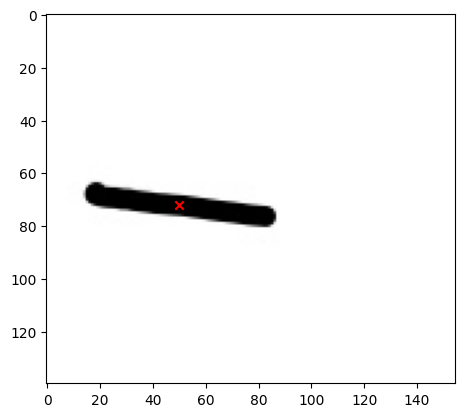

In [22]:
# Find the contour with the largest area (assuming it's the handwritten symbol)
largest_contour = max(contours, key=cv2.contourArea)

# Find the centroid of the largest contour
M = cv2.moments(largest_contour)
centroid_x = int(M['m10'] / M['m00'])
centroid_y = int(M['m01'] / M['m00'])

# Plot the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Plot the centroid
plt.scatter(centroid_x, centroid_y, color='red', marker='x')

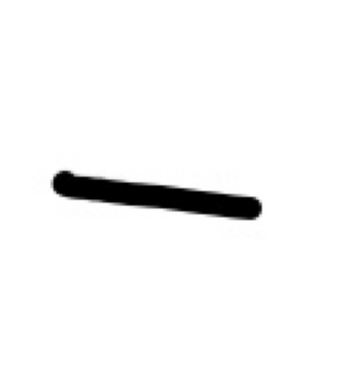

In [29]:
# Define the size of the crop region around the centroid
crop_size = 64

# Calculate the coordinates of the bounding box
x1 = max(0, centroid_x - crop_size)
y1 = max(0, centroid_y - crop_size)
x2 = min(image.shape[1], centroid_x + crop_size)
y2 = min(image.shape[0], centroid_y + crop_size)

# Crop the image
cropped_image = image[y1:y2, x1:x2]

# Plot the cropped image
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [30]:
# Save the cropped image
cv2.imwrite('12_cropped.png', cropped_image)

True